<a href="https://colab.research.google.com/github/ronandenyer/Mickey_Ninjas/blob/Time_Windows/Steinmetz_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Steinmetz SPIKING data

In [2]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  




# Loading Steinmetz LFP data

In [ ]:
#@title Data retrieval
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
#@title Data loading
import numpy as np

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']


# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = dat_LFP[11]
print(dat.keys())
dat = dat_WAV[11]
print(dat.keys())
dat = dat_ST[11]
print(dat.keys())

`dat_LFP`, `dat_WAV`, `dat_ST` contain 39 sessions from 10 mice, data from Steinmetz et al, 2019, supplemental to the main data provided for NMA. Time bins for all measurements are 10ms, starting 500ms before stimulus onset (same as the main data). The followin fields are available across the three supplemental files. 

* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['ss']`: neurons by trials. Exact spikes times for each neuron and each trial, reference to the stimulus onset. A (neuron,trial) entry can be an empty list if that neuron did not fire at all on that trial. 
* `dat['%X%_passive']`: same as above for `X` = {`lfp`, `ss`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




# Exploration playground (anyone)

In [ ]:
import matplotlib.pyplot as plt

for area in range(len(dat_LFP[11]['lfp'])):
  plt.plot(dat_LFP[11]['lfp'][area][0], 'K', alpha = 0.2)

plt.show()

NameError: ignored

# Time window between visual stimulus and later event code(Ronan)

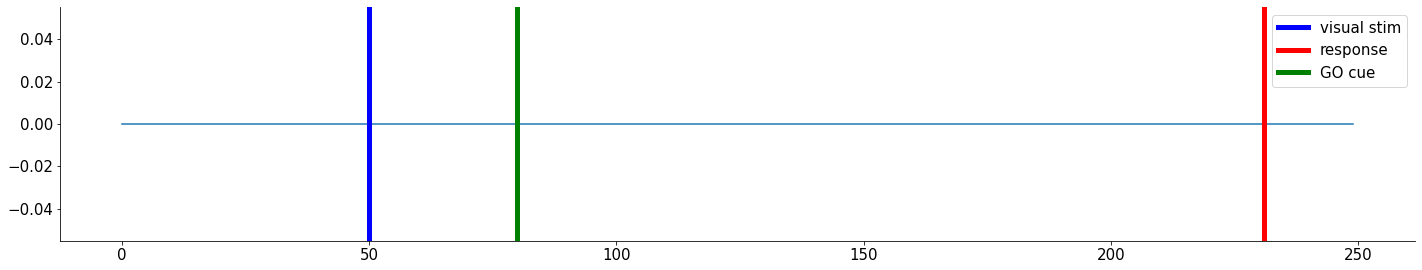

In [ ]:
# function to loop through trial data and create 2 x 1 array describing the time
# point at which visual stimulus was displayed and a second event within the 
# trial (e.g. response, go cue onset). Option to keep units in seconds or change
# to 10ms time bin format used by spike data

def time_window_between_events(start_window_variable, end_window_variable, spike_rate_format=True):
  '''
  Creates a time window on visual stim onset to later trial event

  Args:
    start_window_variable (float)               : fixed value for visual stim onset (s)
    end_window_variable (numpy array of floats) : array of second event times per trial (s)
    spike_rate_format (boolean)                 : boolean whether to calculate in 10ms bins
  
  Returns:
    numpy array of floats

  '''
  number_trials = len(end_window_variable) #loop through number of trials per session
  start_window = start_window_variable
  time_window = np.zeros((number_trials, 2)) #initialize time_window variable
  
  
  for trial in range(number_trials):
    time_window[trial] = np.array([start_window, end_window_variable[trial][0]])
    
  if spike_rate_format:
    time_window = np.round(time_window * 100)


  return time_window

for session in range(len(alldat)):
  
  dat = alldat[session]
  dat['stim_response_time_window'] = time_window_between_events(dat['stim_onset'], dat['response_time'])
  dat['stim_gocue_time_window'] = time_window_between_events(dat['stim_onset'], dat['gocue'])
  alldat[session] = dat
  

# example plot of time windows on single trial
subject = 0
trial = 211

plt.plot(alldat[subject]['spks'][trial][0])
plt.axvline(alldat[subject]['stim_response_time_window'][trial][0], color='blue', linewidth=5, label = 'visual stim')
plt.axvline(alldat[subject]['stim_response_time_window'][trial][1], color='red', linewidth=5, label='response')
plt.axvline(alldat[subject]['stim_gocue_time_window'][trial][1], color='green', linewidth=5, label='GO cue')
plt.legend()










#Time Window Around Given Event (Ronan)

In [8]:
# Code to create time window around a given trial event

def time_window_around_event(event, time_before, time_after, visual_stim=False, spike_rate_format=True):
  '''
  Creates a time window around a trial event.
  Note that if window around visual stimulus is desired, still need to provide
  another event type (e.g. response time) to allow function to find number of trials per session

  Args:
  event (numpy array): array of event times per trial (s)
  time_before (float): amount of time desired before trial event in seconds
  time_after (float): amount of time desired after trial event in seconds
  visual_stim (boolean): boolean whether a window around visual stimulus onset is desired
  spike_rate_format (boolean): boolean whether to calculate in 10ms bins
  '''

  number_trials = len(event) #loop through number of trials per session
  time_window = np.zeros((number_trials, 2)) #initialize time_window variable
  
  if visual_stim:
    for trial in range(number_trials):
      time_window[trial] = np.array([0.5 - time_before, 0.5 + time_after]) #since vis stim onset is fixed, can use 0.5 for all windows

  else:  
    for trial in range(number_trials):
      time_window[trial] = np.array([event[trial][0] - time_before, event[trial][0] + time_after])

  if spike_rate_format:
    time_window = np.round(time_window * 100)

  return time_window


for session in range(len(alldat)):
  
  dat = alldat[session]
  dat['gocue_time_window'] = time_window_around_event(dat['gocue'], 0.1, 0.4)
  dat['response_time_window'] = time_window_around_event(dat['response_time'], 0.1, 0.4)
  alldat[session] = dat

print(alldat.keys())

# example plot of time windows on single trial
subject = 0
trial = 203
neuron = 190
var = alldat[subject]['gocue_time_window']
plt.plot(alldat[subject]['spks'][trial][neuron])
plt.axvline(var[trial][0], color='green', linewidth=5, label='Window Start')
plt.axvline(var[trial][1], color='blue', linewidth=5, label='Window End')
plt.legend()



AttributeError: ignored